# Volatile Travel Along The Surface of Mercury

Author: **Kevin Lie-Atjam**

In [1]:
import matplotlib.pyplot as plt
import src.expectation as statistics
import src.model as model

## Introduction

In Butler's paper "The migration of volatiles on the surface of Mercury and the moon" published in 1997, water and carbon dioxide traverse the surface of Mercury and the Moon through a process called volatile migration. Butler runs a simulation where molecules of either water or carbon dioxide are randomly placed along the surface of Mercury and the moon. We are interested with the surface of Mercury. When the molecules are allowed to move due to thermodynamic processes, around 5-15% of the water molecules in the simulation traveled to cold trap depositions located near the poles of the planet. This project verifies the results outlined in the paper as well as view statistically how the volatiles are lost and where it occurs.


# Abstractions and Modeling Decisions

There were a couple of modeling decisions that had to be made to try and replicate the results described in the paper outlined by Butler. Here were a couple of the deicions made.

1. Velocity PDF: The Velocity PDF was the largest design decision that deviated from the paper.

One of the velocity PDF's was demonstrated as the following

$f(v_0) = 4\pi(\frac{m}{2\pi k_b T})^\frac{3}{2}v_0^2e^{\frac{-mv_0^2}{2k_b T}}$

This is a probability density function which means that the area underneath the entire domain must equal 1.
$\int_{-\infty}^{\infty}4\pi(\frac{m}{2\pi k_b T})^\frac{3}{2}v_0^2e^{\frac{-mv_0^2}{2k_b T}} \ dv_0 = 1$

Notice how there is a Gaussian term multipied by an quadratic. We can approximate this PDF more simply by modeling it to a Gaussian distribution curve without the quadratic term. We must first find the average  of the velocities generated from the PDF. This is called finding the expectation value of the velocity function and it can be done by multiplying a velocity operator within the integrand.

$\langle v_0 \rangle = \int_{-\infty}^{\infty}4\pi(\frac{m}{2\pi k_b T})^\frac{3}{2}v_0^3e^{\frac{-mv_0^2}{2k_b T}} \ dv_0$

This function is an odd function which means that the area on the left side has a negative but equal value to the area on the right side. As a result, this integral is simply equal to zero.

We will then want to find the expectation value of the velocity squared which isn't as trivial to find

$\langle v_0^2 \rangle = \int_{-\infty}^{\infty}4\pi(\frac{m}{2\pi k_b T})^\frac{3}{2}v_0^4e^{\frac{-mv_0^2}{2k_b T}} \ dv_0$

Solving this integral analytically yields

$\langle v_0^2 \rangle = \frac{3 k_b T}{m}$

We can then used this to find standard deviation which is equal to the following

$\sigma_{v_0} = \sqrt{\langle v_0^2 \rangle - \langle v_0 \rangle^2} = \sqrt{\frac{3 k_b T}{m} - 0} = \sqrt{\frac{3 k_b T}{m}}$

Temperature is defined as the average kinetic energy in an given system. That means that there is an average velocity which is equal to ${\frac{3 k_b T}{m}}$ by using a kinetic energy relationship. That essentially means that we can sample a random normal distribution curve with the mean of the Gaussian as well as the standard deviation of the Gaussian both being equal to ${\frac{3 k_b T}{m}}$ to get a close approximation. Additionally, this makes sense physically. If we were to say that the temperature of the system were absolute zero, there can be no temperature lower than absolute zero which means that all particles must be at absolute zero. The preceding formulation agreesw with this statement.

2. Lattitude Placement: The placement along the lattitude of Mercury was calculated on an $\cos^{-1}(\theta)$ distribution to place a bias on putting the molecules nearby to the equator rather than the poles of the planet. If this wasn't done, a proportional amount of molecules would be set into the cold trap immediately.

3. Longitude Placement: The paper states that the initial placement along the planet was assumed to be isotropic which implies that it is uniformly distributed. For that reason, the volatiles were randomly placed in reference to the longitude.

4. Launch Angle: The launch angle was calculated on an $\cos^{-1}(\theta)$ distribution to bias the angle close to 45 degrees which makes it less likely that the particle will launch at an angle close to 0 or 90 degrees.

5. Temperature Binning: In the paper, the temeperature of a volatile is defined by 10 degree lattitude bins which means that the temperatures are essentially discretized. Because assuming that the temperature along the planet is continuous does not deviate too much from the binning, the temperature along the planet can be assumed to be continous.

6. Loss Removal: The main losses in the simulation are photodestruction, Jeans escape, and cold trap deposition. Because Jeans escape is when the escape velocity is exceeded and that photodestruction depends on how long the volatile spends in the air, the order at which each of the volatiles are removed goes as follows: First the volatile is evaluated on whether or not it has escaped the atmosphere. If it lands then checked to see if the volatile has landed in a cold trap. After it has spent time in the air, there is a chance the volatile has encountered a photon for photodestruction. If none of those have happened, then the volatile is still in the simulation.


In [2]:
(photo_stats, cold_stats, 
 jean_stats, cold_phi, 
 cold_theta, jeans_phi, 
 jeans_theta, photo_phi,
 photo_theta) = statistics.simulate(5000, 20)

In [3]:
photo_mean, photo_med, photo_std = statistics.calculate_statistics(photo_stats)
cold_mean, cold_med, cold_std = statistics.calculate_statistics(cold_stats)
jeans_mean, jeans_med, jeans_std = statistics.calculate_statistics(jean_stats)

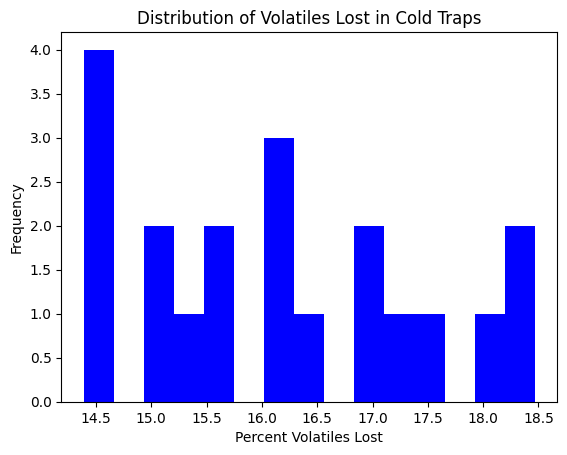

In [4]:
model.plot_histogram(cold_stats, "blue", 15);
plt.title("Distribution of Volatiles Lost in Cold Traps");
plt.xlabel("Percent Volatiles Lost");
plt.ylabel("Frequency");

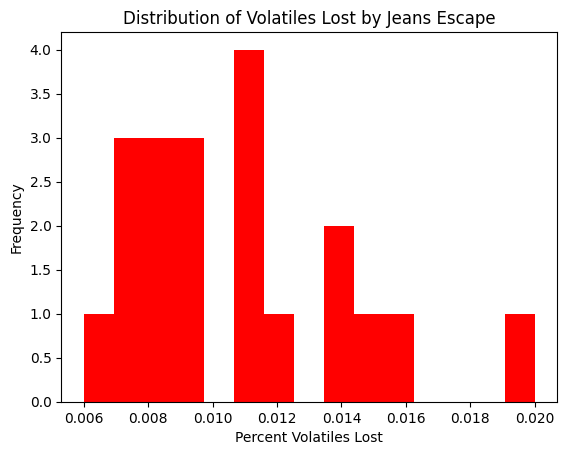

In [5]:
model.plot_histogram(jean_stats, "red", 15);
plt.title("Distribution of Volatiles Lost by Jeans Escape");
plt.xlabel("Percent Volatiles Lost");
plt.ylabel("Frequency");

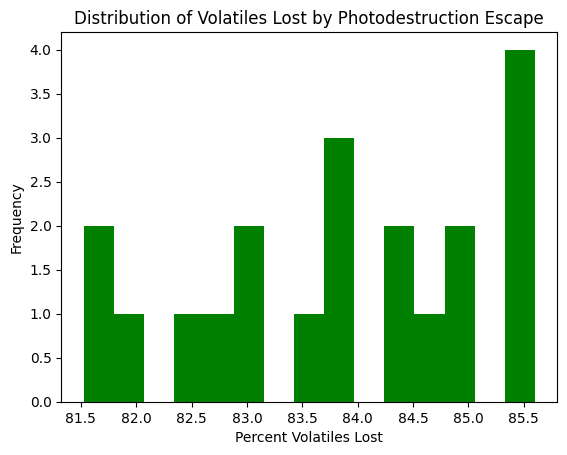

In [6]:
model.plot_histogram(photo_stats, "green", 15);
plt.title("Distribution of Volatiles Lost by Photodestruction Escape");
plt.xlabel("Percent Volatiles Lost");
plt.ylabel("Frequency");

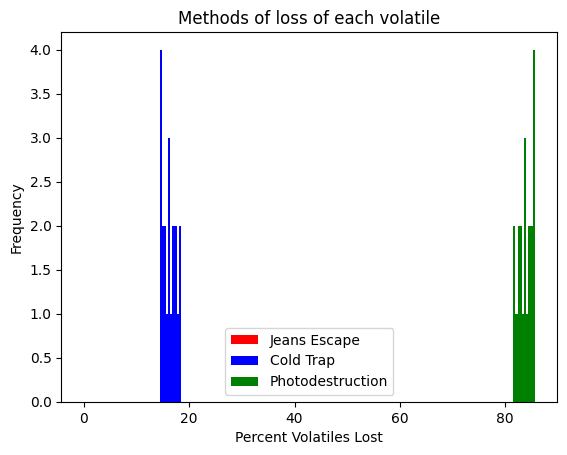

In [8]:
model.compound_histogram(jean_stats, cold_stats, photo_stats, bins=10);
plt.title("Methods of loss of each volatile");
plt.xlabel("Percent Volatiles Lost");
plt.ylabel("Frequency");